Проанализируем входные данные, подгрузив исходный датасет.

In [38]:
import numpy as np
import pandas as pd
import re

#data = pd.read_excel('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_HR/datasets/%D0%94%D0%B0%D1%82%D0%B0%D0%A1%D0%B5%D1%82%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5%20581%20%D1%80%D0%B5%D0%B7%D1%8E%D0%BC%D0%B5.xlsx')
#data = pd.read_excel('/Users/elenasokolova/Downloads/5811.xlsx');
data = pd.read_excel('/Users/elenasokolova/Downloads/ДатаСет_Оценка_резюме_581_резюме_3_0_без_оценки.xlsx');
data.head()

,Unnamed: 0,Дата отклика,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования\nИсследование рынка...,NaN,Анализ рынка\nУправление проектами\nProduct Ma...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста\nВ2В\n\nЗадачи:\n- Раз...,NaN,Самомотивация\nТаймменеджмент\nКреативность\nЧ...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я ни занимался с 2014 года, когда решил...",Продвижение бренда\nПланирование маркетинговых...,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),1. Исследование рынка\n2. Определение целевой ...,"Я проактивный, коммуникабельный, позитивный, д...",Управление проектами\nОрганизаторские навыки\n...,"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,Переговоры со стейкхолдером\n- Составление ТЗ...,Набрал кучу опыта и хочу с ним найти классную ...,Управление персоналом\nЗаключение договоров\nА...,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


При первичном анализе видно, что данные обладают рядом проблем, а именно:
- не по всем должностям есть примеры кандидатов с положительным вердиктом
- не по всем строкам заполнен целевой показатель
- отсуствуют значимые для приема кандидата данные (а именно сведения о его навыках и компетенциях)
- нет описания самой вакансии для понимания, а кого именно ищет компания на определенную должность.

По указанным выше причинам модель будет обладать невысоким качеством предсказания.

**Подготовка dataset-а**

Чтобы проверить гипотезу оставим для обученияданные только по одно из подбираемый должностей (HR-специалист), так как в этом подмножестве есть приемлемое кол-во записей обоих классов.

In [39]:
#data = data.loc[data['Ищет работу на должность']== 'HR-специалист']

In [70]:
# проверим данные на наличие пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 2 to 499
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Unnamed: 0                                  356 non-null    int64 
 1   Дата отклика                                356 non-null    object
 2   Пол, возраст                                356 non-null    object
 3   ЗП                                          356 non-null    object
 4   Ищет работу на должность                    356 non-null    object
 5   Город                                       356 non-null    object
 6   Занятость                                   356 non-null    object
 7   График                                      356 non-null    object
 8   Опыт ()                                     356 non-null    object
 9   Последнее/нынешное место работы             356 non-null    object
 10  Последняя/нынешняя должнос

In [41]:
# убираем строки, для которых не определен целевой параметр и / или имеются пропуска

data = data.dropna()

In [42]:
# убираем столбцы, не влияющие на качество обучения модели

features = data.drop(['Дата отклика', 'Обновление резюме','Unnamed: 0'], axis=1).columns
data_clean = data[features]

In [43]:
# создадим функцию по извлечению возраста из колонки 'Пол, возраст'

def extract_age(arg):
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(',')[:2]
    if len(args_splited) > 1:
        year = int(re.findall(r'\d+', args_splited[1])[0])
    else:
        year = 0
    return year

# и функцию по извлечению возраста

def extract_gender(arg):
    if 'женщина' in arg.lower():
        return 0
    elif 'мужчина' in arg.lower():
        return 1
    else:
        return ""


# создадим две новые колонки для пола и возраста

data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)

# удалим ненужный столбец

data_clean.drop(['Пол, возраст'], axis=1, inplace=True)

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/3396077208.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/3396077208.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/3396077208.py:30: SettingWithCopyWarning: 
A value

In [44]:
# создадим функцию по выделению уровня образования

def get_education_level(arg):
    education_key_words = ['неоконченноевысшее', 'среднееспециальное', 'среднее', 'высшее', 'бакалавр', 'магистр', 'кандидатнаук', 'докторнаук']
    arg = ''.join(arg.split(' ')[:3])
    for i in range(len(education_key_words)):
      if education_key_words[i] in arg.lower():
        return education_key_words[i]
    return ""

# создадим новый столбец для уровня образования и удалим старый столбец

data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)

data_clean['Образование'].value_counts()

/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/2936332594.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/2936332594.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)


высшее                242
среднееспециальное     30
магистр                27
бакалавр               23
неоконченноевысшее     22
среднее                 8
кандидатнаук            4
Name: Образование, dtype: int64

In [45]:
# определим функцию для пересчета опыта работы в месяцы

def get_experience(arg):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']

    if pd.isnull(arg) or arg == 'Не указано':
        return 0

    arg = arg.replace("—", '')
    args_splited = arg.split(' ')[:6]
    month = 0
    year = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
    return int(year)*12 + int(month)

# создадим новый столбец с опытом работы в месяцах
data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)

# для информации посчитаем медианый опыт работы (в месяцах)
print(data_clean['Опыт работы (месяц)'].median())

# удалим ненужный столбнц
data_clean.drop(['Опыт ()'], axis=1, inplace=True)

102.0


/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/663365984.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)
/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/663365984.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Опыт ()'], axis=1, inplace=True)


In [46]:
# кодируем бинарные категориальные признаки

# целевой признак 'Подходит - да/нет' преобразуем к категориальномусформату: да - 1 / нет - 0
data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/867926727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


In [47]:
# определим функции для выделения каждого типа занятости у кандидата

def is_full_employment(arg):
    if 'полная занятость' in arg.lower():
        return 1
    else:
        return 0

def is_part_employment(arg):
    if 'частичная занятость' in arg.lower():
        return 1
    else:
        return 0

def is_project(arg):
    if 'проектная работа' in arg.lower():
        return 1
    else:
        return 0

def is_volunteer(arg):
    if 'волонтёрство' in arg.lower() or 'волонтерство' in arg.lower():
        return 1
    else:
        return 0

def is_intern(arg):
    if 'стажировка' in arg.lower():
        return 1
    else:
        return 0

# опеделим функции для выделения предпочитаемого графика


def is_full_time(arg):
    if 'полный день' in arg.lower():
        return 1
    else:
        return 0

def is_shift_schedule(arg):
    if 'сменный график' in arg.lower():
        return 1
    else:
        return 0

def is_flexible_schedule(arg):
    if 'гибкий график' in arg.lower():
        return 1
    else:
        return 0

def is_remote_work(arg):
    if 'удалённая работа' in arg.lower() or 'удаленная работа' in arg.lower():
        return 1
    else:
        return 0

def is_shift_method(arg):
    if 'вахтовый метод' in arg.lower():
        return 1
    else:
        return 0

# для каждого из возможных типов занятости создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)
data_clean['проектная работа'] = data_clean['Занятость'].apply(is_project)
data_clean['волонтёрство'] = data_clean['Занятость'].apply(is_volunteer)
data_clean['стажировка'] = data_clean['Занятость'].apply(is_intern)


# для каждого из возможных типов рабочего графика создадим свой столбец и проставим 1, если кандидат рассматривает такой вариант и 0, если нет
data_clean['полный день'] = data_clean['График'].apply(is_full_time)
data_clean['сменный график'] = data_clean['График'].apply(is_shift_schedule)
data_clean['гибкий график'] = data_clean['График'].apply(is_flexible_schedule)
data_clean['удалённая работа'] = data_clean['График'].apply(is_remote_work)
data_clean['вахтовый метод'] = data_clean['График'].apply(is_shift_method)

# удалим старые столбцы
data_clean.drop(['Занятость'], axis=1, inplace=True)
data_clean.drop(['График'], axis=1, inplace=True)


/var/folders/lq/6_lqy4850sgc0zqc8fm3vfch0000gn/T/ipykernel_11693/472974710.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)


In [48]:
# создадим функцию для определения города соискателя

def get_city(arg):
    arg = str(arg).lstrip()
    city = arg.split(' ')[0]

    return city.replace(',','')

# создадим функцию для определения, готов ли соискатель к релокации
def get_ready_for_relocation(arg):
    arg = str(arg).lstrip()
    arr = arg.split(',')


    if len(arr) > 3:
        ready_for_relocation = arr[2].strip()
    else:
        ready_for_relocation = arr[1].strip()


    if 'не' in ready_for_relocation.lower():
        return 0
    else:
        return 1

# создадим функцию для определения, готов ли соискатель к командировке
def get_ready_for_businessTrips(arg):
    arg = str(arg).lstrip()
    arr = arg.split(',')

    ready_for_businessTrips = arr[-1].strip()


    if 'не' in ready_for_businessTrips.lower():
        return 0
    else:
        return 1


# выделим данные о готовности соискателя к командировкам и переезду в отдельные столбцы
data_clean['Готовность к переезду'] = data_clean['Город'].apply(get_ready_for_relocation)
data_clean['Готовность к командировкам'] = data_clean['Город'].apply(get_ready_for_businessTrips)

# переопределим значение столбца "город"
# городом соискателя
data_clean['Город'] = data_clean['Город'].apply(get_city)


In [49]:
# просмотрим текущее состояние таблицы

data_clean.head()

,ЗП,Ищет работу на должность,Город,Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Подходит - да/нет,Пол,...,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к переезду,Готовность к командировкам
2,150 000 руб.,Growth Product Manager,Санкт-Петербург,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы я ни занимался с 2014 года, когда решил...",Продвижение бренда\nПланирование маркетинговых...,1,1,...,1,0,0,1,0,1,1,0,1,1
3,не указана,Growth Product Manager,Москва,WeInvest,Product Manager (team leader),1. Исследование рынка\n2. Определение целевой ...,"Я проактивный, коммуникабельный, позитивный, д...",Управление проектами\nОрганизаторские навыки\n...,1,1,...,0,0,1,1,0,1,1,0,1,1
4,150 000 руб.,Growth Product Manager,Пермь,Индивидуальное предпринимательство / частная п...,Product/Project manager,Переговоры со стейкхолдером\n- Составление ТЗ...,Набрал кучу опыта и хочу с ним найти классную ...,Управление персоналом\nЗаключение договоров\nА...,1,1,...,1,0,0,1,0,1,1,0,1,1
7,30 000 руб.,HR-специалист,Уфа,Tiqum,Контент-менеджер,"Работа с сайтами: выкладка контента, редактура...","Вечная ученица - считаю, что знаний не бывает ...",Работа с большим объемом информации\nГрамотная...,1,0,...,0,0,0,1,0,0,0,0,0,0
9,не указана,HR-специалист,Уфа,"Газпромбанк, ОАО",Специалист,Колл центр Встреча и расчёт гостей Работа с на...,"Общительная, легко обучаемая , коммуникабельная",Работа на кассе\nЗнание основ мерчендайзинга\n...,1,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# перекодируем все категориальные признаки в столбцы со значениями 0 / 1 (One Hot Encoding)
data_clean = pd.get_dummies(data_clean)

In [51]:
# убедимся, что все столбцы теперь содержат чиловые данные
data_clean.head()

,Подходит - да/нет,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,...,Ключевые навыки_разрешение проблем\nТехническое обслуживание\nПослепродажное обслуживание\nАвтоматизация\nМенеджмент организаций\nКонтроль качества\nУправление качеством\nPMI\nIPMA\nFMEA\nPPAP\nAPQP\nKaizen\nКайзен\nISO 9001:2008\nISO 9001:2015\nISO 22000\nHACCP\nVDA\nГОСТ 19\nГОСТ 34\nScrum\nскрам\nTrello\nAtlassian Jira\nРазработка продукта\nЛокализация продукта\nMS Project\nOracle Primavera\nЗапуск новых продуктов,"Ключевые навыки_умение грамотно излагать свои мысли устно и письменно\nуправление людьми, подбор персонала, адаптация, мотивация, наставничество\nумение проводить переговоры, презентации, работать с большими объемами информации\nуверенный пользователь ПК (Microsoft Office, Internet, CPM система СЭД, Yclients\nпреподавание различным возрастным группам",Ключевые навыки_умение работать в команде\nработа на результат\nКреативность\nАналитический склад ума\nумение формировать и работать в команде\nВедение переговоров\nДеловая переписка,Образование_бакалавр,Образование_высшее,Образование_кандидатнаук,Образование_магистр,Образование_неоконченноевысшее,Образование_среднее,Образование_среднееспециальное
2,1,1,33,86,1,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,32,106,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,26,69,1,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,1,0,24,60,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,1,0,28,52,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [52]:
# оценим, насколько сбалансирован датасет

print(data_clean['Подходит - да/нет'].value_counts())




0    350
1      6
Name: Подходит - да/нет, dtype: int64


Датасет сильно не сбалансирован: множество кандидатов с веридиктом "да" в 27 раз меньше, чем количество тех, кому отказали.

In [53]:
# выделим из датасетв подмножество успешных кандидатов
extra = data_clean.loc[data_clean['Подходит - да/нет']==1]

In [54]:
# Добавим к данным несколько повторов подмножества с вердиктом "да" для лучшей сбалансированности категорий в датасете

for i in range(7):
    data_clean  = pd.concat([data_clean , extra], ignore_index=True)


In [55]:
# Добавим библиотеки для создания модели нейронной сети и оценки ее качества
import tensorflow as tf

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt

In [56]:
# Выделим целевой показатель в отдельное множество и удалим его из множества входных параметров
features = data_clean.drop('Подходит - да/нет', axis=1).columns
X, y = data_clean[features], data_clean['Подходит - да/нет']


In [57]:
# Выделим обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (238, 1654) (238,)
Test: (160, 1654) (160,)


**Создание модели**

In [58]:
# Создадим последовательную модель из 3 полносвязный слоев (80 - 20 - 1 нейрон)
model = Sequential()


model.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Скомпилируем модель
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# и выведем ее аржитектуру
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                132400    
                                                                 
 dense_4 (Dense)             (None, 20)                1620      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 134041 (523.60 KB)
Trainable params: 134041 (523.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# Провердем обучение нейронной сети
history = model.fit(X_train,     # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=150,            # Количество эпох обучения
          validation_split=0.4,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

Epoch 1/150
18/18 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.8873 - val_loss: 0.1069 - val_accuracy: 0.8646
Epoch 2/150
18/18 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.8944 - val_loss: 0.1083 - val_accuracy: 0.8646
Epoch 3/150
18/18 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.8944 - val_loss: 0.0892 - val_accuracy: 0.8854
Epoch 4/150
18/18 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9366 - val_loss: 0.0762 - val_accuracy: 0.8958
Epoch 5/150
18/18 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9577 - val_loss: 0.0738 - val_accuracy: 0.9062
Epoch 6/150
18/18 [==============================] - 0s 2ms/step - loss: 0.0357 - accuracy: 0.9648 - val_loss: 0.0484 - val_accuracy: 0.9583
Epoch 7/150
18/18 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9789 - val_loss: 0.0374 - val_accuracy: 0.9583
Epoch 8/150
1

In [60]:
# Выведем финальные метрики точности для тестовой выборки

scores = model.evaluate(X_test,
                        y_test,
                        verbose=1
                        )

5/5 [==============================] - 0s 905us/step - loss: 0.0019 - accuracy: 1.0000


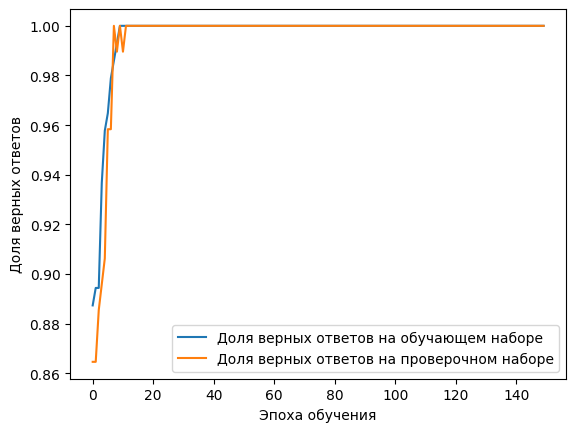

In [61]:
# Визуализируем изменение точности модели в ходе процесса обучения на графике

# Визуализация точности на обучающей выборке
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

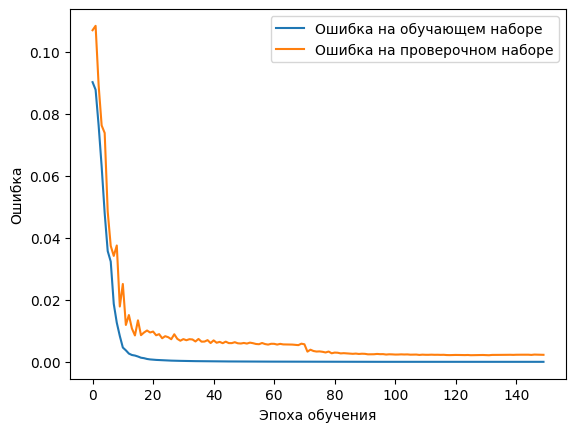

In [62]:
# Построим график изменения ошибки в ходе обучения

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()
plt.show()

In [63]:
# Предскажем значения целевого параметра получившейся моделью для обучающей выборки
y_predict_train = model.predict(X_train)

# Предскажем значения целевого параметра получившейся моделью для тестовой выборки
y_predict_test = model.predict(X_test)

5/5 [==============================] - 0s 645us/step


Метрики для тренировочной выборки:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00
Метрики для тестовой выборки:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00


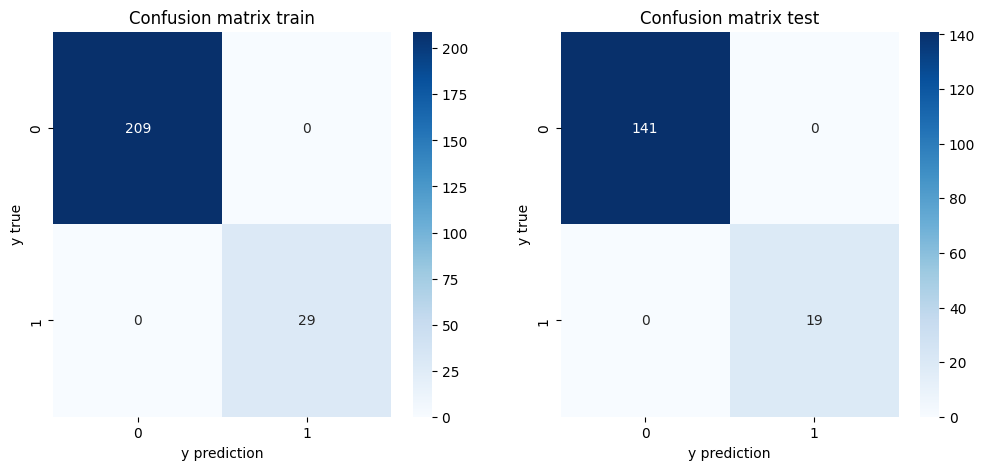

In [64]:
# Посчитаем метрики качества модели на основе получившихся предсказанных моделей


# Вычислим и выведем в графическом виде confusion matrix (матрицу ошибок)
from sklearn import metrics

confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())

import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix test')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion matrix train')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')

# Рассчитаем и выведем числовые метрики
print("Метрики для тренировочной выборки:")
# Метрики для тренировочной выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))

print("Метрики для тестовой выборки:")
# Метрики для тестовой выборки
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
# Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
# Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
# Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))





In [65]:
# Дополним датасет столбцом '% подходит / % нет'

# для начала запишем в отдельный dataframe тестовую выборку

result_csv_predict  = pd.DataFrame(X_test)


In [66]:
#  дополним столбцом с реальным вердиктом по соискателю

result_csv_predict['true_value'] = pd.to_numeric(y_test, downcast="float")

In [67]:
# создадим функцию для расчета процента соответствия / несоответствия кандидата

def calc_conclusion(arg):
  return '{:.2f}'.format(arg * 100) + ' / ' + '{:.2f}'.format(100 - arg * 100)


In [68]:
# выведем расчитанные знаечния в новый столбец

result_csv_predict['% подходит / % нет'] = y_predict_test
result_csv_predict['% подходит / % нет'] = result_csv_predict['% подходит / % нет'].apply(calc_conclusion)

In [69]:
# выведем результаты

result_csv_predict.head(58)

,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,сменный график,...,Ключевые навыки_умение работать в команде\nработа на результат\nКреативность\nАналитический склад ума\nумение формировать и работать в команде\nВедение переговоров\nДеловая переписка,Образование_бакалавр,Образование_высшее,Образование_кандидатнаук,Образование_магистр,Образование_неоконченноевысшее,Образование_среднее,Образование_среднееспециальное,true_value,% подходит / % нет
354,0,35,146,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0.0,0.09 / 99.91
308,0,53,174,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0.0,0.25 / 99.75
69,1,30,85,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0.0,7.15 / 92.85
368,1,33,86,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1.0,99.84 / 0.16
45,1,26,63,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0.0,1.76 / 98.24
25,1,21,64,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0.0,0.65 / 99.35
273,0,0,198,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0.0,0.00 / 100.00
192,1,27,62,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0.0,0.05 / 99.95
381,1,32,106,1,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1.0,99.89 / 0.11
246,1,42,237,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0.0,0.00 / 100.00
